In [1]:
print("har har mahadev")

har har mahadev


ANS1

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 53.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 75.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 81.8 MB/s eta 0:00:

In [4]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

# Keras is integrated into TensorFlow, so it's accessed via tf.keras
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.13.0


AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

ANS2

In [8]:
import pandas as pd
data  = pd.read_csv("wine.csv")

## Print the dimensions of the dataset
print("Row of the dataset:",data.shape[0])
print("Column of the dataset:",data.shape[1])

Row of the dataset: 1599
Column of the dataset: 12


ANS3

In [15]:
##Checking the null values
null_values = data.isnull().sum()
print("Null Values:",null_values)


# Identify categorical variables
categorical_vars = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:")
print(categorical_vars)


from sklearn.preprocessing import LabelEncoder
 #Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables using label encoding
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])

Null Values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical Variables:
Index(['quality'], dtype='object')


ANS4

In [25]:
X = data.drop('quality',axis=1) # Features (all columns except "quality")
y = data['quality']

In [26]:
X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

ANS5

In [39]:
from sklearn.model_selection import train_test_split

# Perform an initial train-test split (e.g., 70% train, 30% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Further split the training set into a training set and a validation set (e.g., 70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)



Training set shape: (783, 11)
Validation set shape: (480, 11)


ANS6

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


ANS7

In [42]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential()

# Input layer (specify the input shape)
model.add(keras.layers.Input(shape=(X_train_scaled.shape[0],)))  # Replace 'input_dim' with the number of features

# Hidden layers (at least two)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Output layer (for binary classification)
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50176     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52289 (204.25 KB)
Trainable params: 52289 (204.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANS8

In [44]:
from tensorflow import keras

# Create a Sequential model
model = keras.Sequential()

# Add the input layer (assuming input_dim is the number of features)
model.add(keras.layers.Input(shape=(X_train_scaled.shape[0],)))

# Add the first hidden layer with 64 neurons and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))

# Add the second hidden layer with 32 neurons and ReLU activation
model.add(keras.layers.Dense(32, activation='relu'))

# Add the output layer for binary classification with sigmoid activation
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with an appropriate optimizer, loss, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50176     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52289 (204.25 KB)
Trainable params: 52289 (204.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANS9

In [45]:
# Print a summary of the model's architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50176     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52289 (204.25 KB)
Trainable params: 52289 (204.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANS10

In [46]:
from tensorflow import keras

# Define the optimizer (e.g., Adam) and compile the model
model.compile(optimizer='adam',  # You can replace 'adam' with other optimizers like 'sgd' or 'rmsprop'
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])  # Include accuracy metric


ANS11

In [47]:
# Assuming you have already created the model as described earlier
from tensorflow import keras

# Define the optimizer (e.g., Adam) and compile the model
model.compile(optimizer='adam',  # You can replace 'adam' with other optimizers like 'sgd' or 'rmsprop'
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])  # Include accuracy metric

# Print a summary of the model's architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50176     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52289 (204.25 KB)
Trainable params: 52289 (204.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


ANS12

In [51]:
# Fit the model to the training data with a specified batch size and number of epochs
history = model.fit(X_train,  # Training features
                    y_train,  # Training labels
                    batch_size=32,  # Batch size (adjust as needed)
                    epochs=10,  # Number of training epochs (adjust as needed)
                    validation_data=(X_val, y_val))  # Validation data


Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 783), found shape=(None, 11)


ANS13

In [52]:
# Get the model's parameters (weights and biases)
model_params = model.get_weights()

# Print the parameters for each layer
for i, layer_params in enumerate(model_params):
    print(f"Layer {i} Parameters:")
    for param in layer_params:
        print(param.shape)


Layer 0 Parameters:
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(6

ANS14

In [53]:
import pandas as pd

# Assuming you have already trained the model and have the 'history' object

# Convert the 'history' object to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)


NameError: name 'history' is not defined

ANS15

NameError: name 'history' is not defined

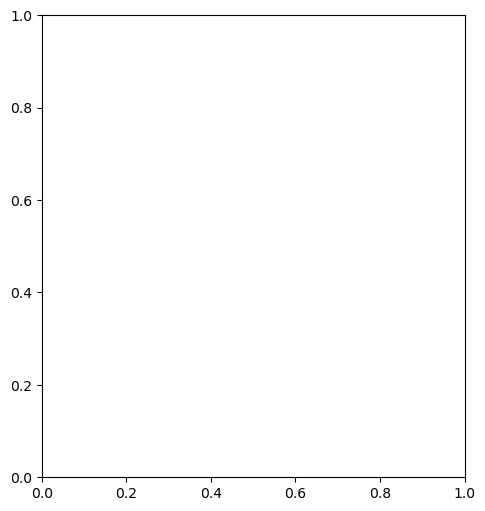

In [54]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the 'history' object

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
ANS16